# Markov Chain Monte Carlo

Let's start with a terrific reference, by [Patrick Lam, Harvard](http://www.people.fas.harvard.edu/~plam/teaching/methods/mcmc/mcmc_print.pdf). 

In a previous notebook we used a Monte Carlo method to estimate the value of $\pi$. This was done using a method known as direct sampling. 

Let's review the methodology we used to compute integrals:

- We threw out a large number of random numbers
- We picked those that were inside some region of interest.
- We used the same method to produce a sample of points that followed a given probability density distribution. 

But surprisingly soon we ran into a problem. If the function wasn't *nice* or the problem had very high dimensionality the number of points we threw was very high in comparison with the points that we kept.

A nice function is a gaussian:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


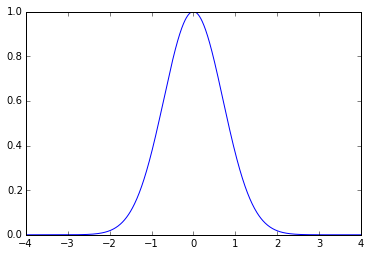

In [2]:
x = linspace(-4.0,4.0,1000)
f = exp(-(x**2))
plot(x,f)

It was relatively easy to get a bunch of random numbers following falling *below* the curve. But now consider this non-normalized probability density function:



$$
\exp\bigg(\frac{-x^2}{(x-x_0)^2 + aˆ2}\bigg)
$$

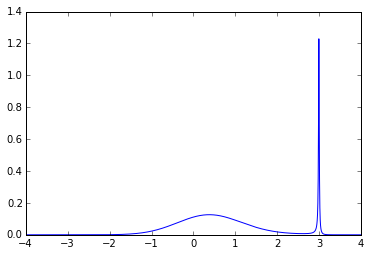

In [3]:
def nasty_function(x):
    x_0 = 3.0
    a = 0.01
    return exp(-(x**2))/((x-x_0)**2 + a**2)

f = nasty_function(x)
plot(x,f)

That function will be much harder to sample properly. Why?


Because of the very narrow peak you see on the right. If you throw a bunch of numbers most of them will be rejected until you start to get a proper number of accepted points below the curve. 

In these cases direct sampling is not an option. This is the motivation to start using Markov Chain sampling.

## Examples of Random-walk Monte Carlo Methods

- **Metropolis–Hastings algorithm**: This method generates a random walk using a proposal density and a method for rejecting some of the proposed moves.
- **Gibbs sampling**: This method requires all the conditional distributions of the target distribution to be sampled exactly. It is popular partly because it does not require any 'tuning'.
- **Slice sampling**: This method depends on the principle that one can sample from a distribution by sampling uniformly from the region under the plot of its density function. It alternates uniform sampling in the vertical direction with uniform sampling from the horizontal 'slice' defined by the current vertical position.
- **Multiple-try Metropolis**: This method is a variation of the Metropolis–Hastings algorithm that allows multiple trials at each point. By making it possible to take larger steps at each iteration, it helps address the curse of dimensionality.
- **Reversible-jump**: This method is a variant of the Metropolis–Hastings algorithm that allows proposals that change the dimensionality of the space.[4] MCMC methods that change dimensionality have long been used in statistical physics applications, where for some problems a distribution that is a grand canonical ensemble is used (e.g., when the number of molecules in a box is variable). But the reversible-jump variant is useful when doing MCMC or Gibbs sampling over nonparametric Bayesian models such as those involving the Dirichlet process or Chinese restaurant process, where the number of mixing components/clusters/etc. is automatically inferred from the data.

## Metropolis-Hastings algorithm

Markov Chain methods are a family of algorithms used to efficiently sample a probability density function. These are based in a *random walk* in the space of parameters we are interested in. There are different ways to **walk this random walk**. One of this ways is known as the Metropolis-Hastings algorithm.

The way the algorithm works is as follows: 

Let's say that we want to build a series of points that samples the nasty function we had above. One way to see it is that I want to have a set of values for the variable $x$ whose histogram follows the function we had before.

The **first part of the initalization** is getting an initial step $x_{t}$ in the interval we care about, say [-4:4]

In [4]:
x_walk = empty((0)) #this is an empty list to keep all the steps
x_0 = 8.0*((random.random())-0.5) #this is the initialization
x_walk = append(x_walk,x_0)
print(x_walk)

[ 0.57587092]


The **second part of the initialization** is picking a *second* probability function that generates a new random number from the previous one. Usually this function is a Gaussian centered at the previous point.  

What we do is:
- We take another small step in our walk on the $x$ axis.
- We use the gaussian to avoid going to far from the previous step.

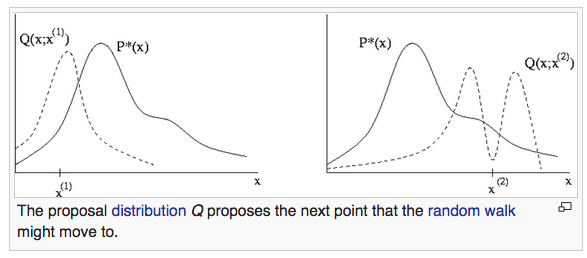

In [5]:
from IPython.display import Image
Image(filename='metropolis-hastings.png')

Now comes the **iteration part**. 

* We generate a new candidate point $x^{\prime}$ from the previous one (we use the Gaussian PDF)
* We compute the acceptance ratio $\alpha=f(x^\prime)/f(x)$, where $f(x)$ is the function we wish to sample.
* If $\alpha>1.0$ it means that the candidate point has more probability to be be sampled than the previous point $x$.
    * In that case we accept $x^\prime$ as the next step $x_{t+1}=x^{\prime}$. 
* If $\alpha<1.0$ we accept $x^{\prime}$ with probability $\alpha$. 
    * That means that we draw a random number $\beta$ from a uniform probability distribution.
        * if $\beta<\alpha$ we accept $x_{t+1}=x^{\prime}$. 
        * In the opposite case we take $x_{t+1}=x_{t}$.

In [6]:
n_iterations = 200000 #this is the number of iterations I want to make
for i in range(n_iterations):
    x_prime = np.random.normal(x_walk[i], 0.1) #0.1 is the sigma (std. dev) in the normal distribution
    alpha = nasty_function(x_prime)/nasty_function(x_walk[i])
    if(alpha>=1.0):
        x_walk  = append(x_walk,x_prime)
    else:
        beta = random.random()
        if(beta<=alpha):
            x_walk = append(x_walk,x_prime)
        else:
            x_walk = append(x_walk,x_walk[i])


(0.0, 2.0)

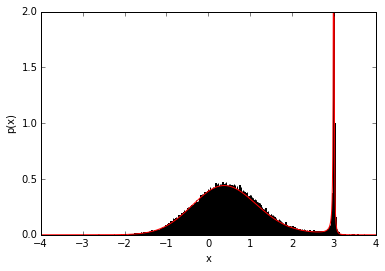

In [7]:
f = nasty_function(x)
norm = sum(f*(x[1]-x[0]))
plot(x,f/norm, linewidth=1, color='r')
count, bins, ignored = plt.hist(x_walk, 1000, normed=True)

#fig = figure(1, figsize=(9.5,6.5))
plt.xlabel('x')
plt.ylabel('p(x)')
ax = axes()
ax.set_xlim([-4.0,4.0])
ax.set_ylim([0.0,2.0])

#Exercise 1
Implement MCMC to sample a *gaussian* probability density

$$
f(x) = \exp\left(-\frac{(x-30.0)^2}{100}\right)
$$

#Exercise
Implement a 2D MCMC to sample a probability density function that is proportional to the following function:

$$
f(x_1,x_2) = \exp\left(-\frac{100(x_2-x_1^2)^2 + (1-x_1)^2}{20}\right)
$$

Here is how the density contours for $f(x_1,x_2)$ look like: https://github.com/dfm/MarkovPy/wiki/Sampling-Rosenbrock-Density